## Evaluación del modelo

Describiendo los datos


FuelConsumption.csv,  contiene la clasificaciones de consumo de combustible específicas del modelo y emisiones estimadas de dióxido de carbono para vehículos livianos nuevos en el mercado Canadiense del año 2014 [Dataset](https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODELYEAR** : Año del modelo, todos son del 2014
- **MAKE** : Marca del auto
- **MODEL** : Modelo
- **VEHICLE CLASS**  : Tipo de vehiculo
- **ENGINE SIZE** : Tamaño del motor (total del desplazamiento de todos los cilindros en litros)
- **CYLINDERS** : Número de cilindros
- **TRANSMISSION** : TIpo de transmisión
- **FUEL CONSUMPTION in CITY(L/100 km)** : Consumo de combustible en litros por km en la ciudad.
- **FUEL CONSUMPTION in HWY (L/100 km)** : Consumo de combustible en litros por km en la autopista.
- **FUEL CONSUMPTION COMB (L/100 km)** : Consumo de combustible en litros por km en ciudad  y autopista.
- **CO2 EMISSIONS (g/km)** : Emisiones de CO2 en gramos por kilometro 

Ref English : https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64/resource/d589f2bc-9a85-4f65-be2f-20f17debfcb1

In [6]:
'''
Curso : Análisis de Datos con Python
Fecha : 17/01/2026
'''

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
df = pd.read_csv('dataset/my2025-fuel-consumption-ratings.csv', encoding='latin-1')
df.head()

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating
0,2025,Acura,Integra A-SPEC,Full-size,1.5,4,AV7,Z,8.1,6.5,7.4,38,172,6,6
1,2025,Acura,Integra A-SPEC,Full-size,1.5,4,M6,Z,8.9,6.5,7.8,36,181,6,5
2,2025,Acura,Integra Type S,Full-size,2.0,4,M6,Z,11.1,8.3,9.9,29,230,5,5
3,2025,Acura,MDX SH-AWD,Sport utility vehicle: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,4
4,2025,Acura,MDX SH-AWD Type S,Sport utility vehicle: Standard,3.0,6,AS10,Z,13.8,11.2,12.4,23,291,4,4


In [9]:
df.dtypes

Model year                int64
Make                     object
Model                    object
Vehicle class            object
Engine size (L)         float64
Cylinders                 int64
Transmission             object
Fuel type                object
City (L/100 km)         float64
Highway (L/100 km)      float64
Combined (L/100 km)     float64
Combined (mpg)            int64
CO2 emissions (g/km)      int64
CO2 rating                int64
Smog rating               int64
dtype: object

In [ ]:
df.rename(columns={'Engine size (L)': 'ENGINESIZE',
                    'Combined (L/100 km)': 'FUELCONSUMPTION_COMB',
                    'Cylinders': 'CYLINDERS',
                   'CO2 emissions (g/km)': 'CO2EMISSIONS'}, inplace=True)


In [17]:
df.dtypes

Model year                int64
Make                     object
Model                    object
Vehicle class            object
ENGINESIZE              float64
CYLINDERS                 int64
Transmission             object
Fuel type                object
City (L/100 km)         float64
Highway (L/100 km)      float64
FUELCONSUMPTION_COMB    float64
Combined (mpg)            int64
CO2EMISSIONS              int64
CO2 rating                int64
Smog rating               int64
dtype: object

In [ ]:
df.dtypes

MODELYEAR                     int64
MAKE                         object
MODEL                        object
VEHICLECLASS                 object
ENGINESIZE                  float64
CYLINDERS                     int64
TRANSMISSION                 object
FUELTYPE                     object
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
CO2EMISSIONS                  int64
dtype: object

In [ ]:
df.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [ ]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [ ]:
df.describe(include=[object])

,MAKE,MODEL,VEHICLECLASS,TRANSMISSION,FUELTYPE
count,1067,1067,1067,1067,1067
unique,39,663,16,22,4
top,FORD,F150 FFV,MID-SIZE,A6,X
freq,90,8,178,222,514


In [ ]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


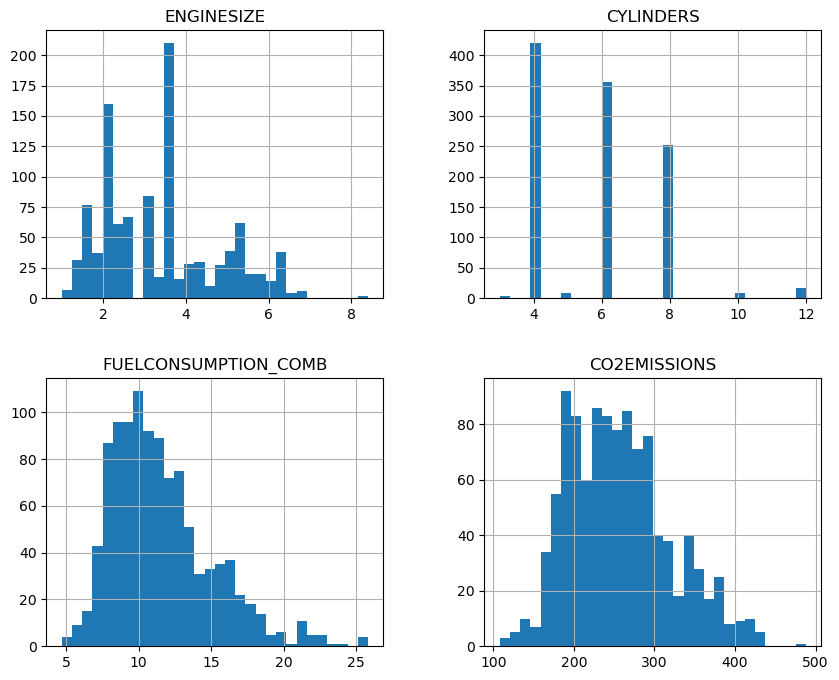

In [ ]:
df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']].hist(bins=30, figsize=(10,8))
plt.show()

Generando diagramas de Regresión

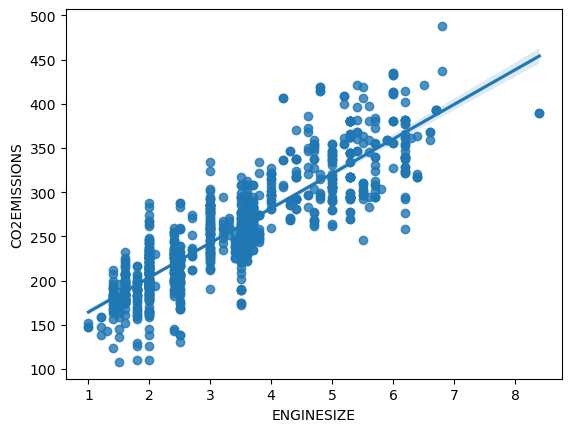

In [ ]:
sns.regplot(x="ENGINESIZE", y="CO2EMISSIONS", data=cdf)
plt.show()

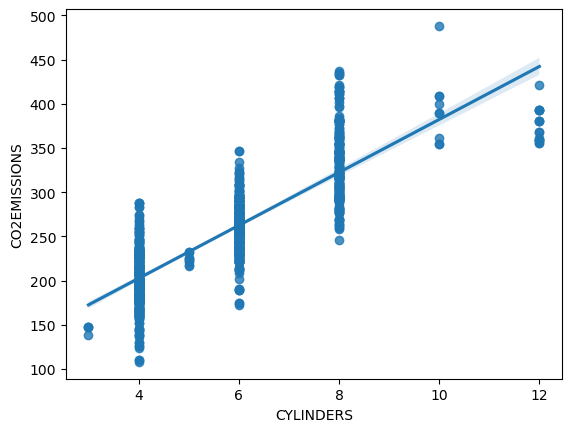

In [ ]:
sns.regplot(x="CYLINDERS", y="CO2EMISSIONS", data=cdf)
plt.show()

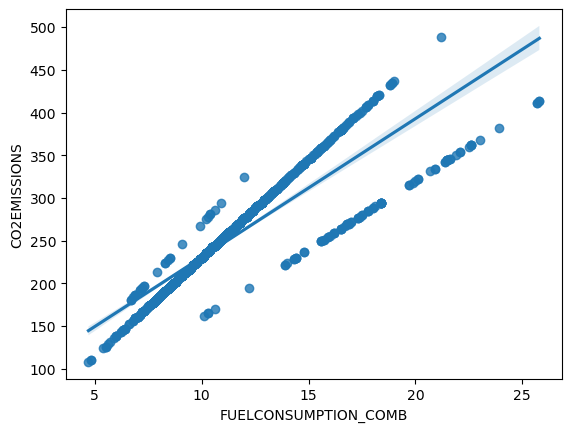

In [ ]:
sns.regplot(x="FUELCONSUMPTION_COMB", y="CO2EMISSIONS", data=cdf  )   
plt.show()

# PARTE 1: Modelo de regresión simple una sola variable predictora

### 3. Seleccionando variable independiente y dependiente y separando datos en entrenamiento y prueba


In [548]:
X = cdf[['ENGINESIZE']]
y = cdf['CO2EMISSIONS']

print("Tamaño de X:", X.shape)

Tamaño de X: (1067, 1)


In [549]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Tamaño de X_train:", X_train.shape)
print("Tamaño de X_test:", X_test.shape)
print("Tamaño de y_train:", y_train.shape)
print("Tamaño de y_test:", y_test.shape)

Tamaño de X_train: (853, 1)
Tamaño de X_test: (214, 1)
Tamaño de y_train: (853,)
Tamaño de y_test: (214,)


### 4.- Aplicando regresión simple, mostrando los coeficientes y escribiendo la ecuación


In [550]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train) 

print("Coeficiente:", lm.coef_)
print("Intercepción:", lm.intercept_)

Coeficiente: [38.99297872]
Intercepción: 126.28970217408764


$$ \hat{y} = 126.29 + 38.99x $$

### 4.-Calculando valores predichos, errores, graficando la ecuación y los residuos de los datos de entrenamiento


In [551]:
df_train = pd.concat([X_train, y_train], axis=1)


#### Graficamos el modelo

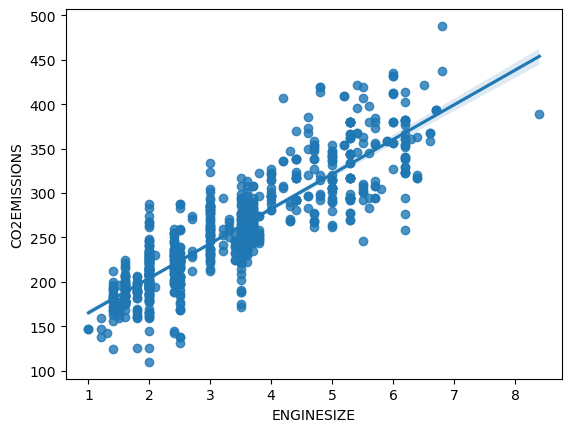

In [552]:
sns.regplot(x="ENGINESIZE", y="CO2EMISSIONS", data=df_train, fit_reg=True)
plt.show()

####  Graficamos los residuales

In [553]:
df_train["ERROR"] = y_train - lm.predict(X_train)
df_train["ERROR"].head()

333    -1.879872
106    -5.858809
585    23.731362
55     18.731362
213    47.047511
Name: ERROR, dtype: float64

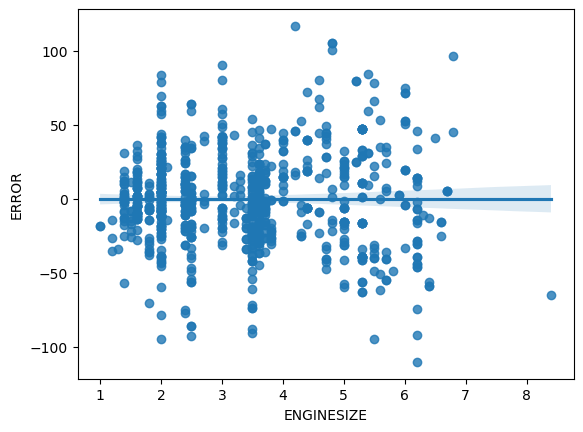

In [554]:
sns.regplot(x="ENGINESIZE", y="ERROR", data=df_train, fit_reg=True)
plt.show()

### 5.- Calculando valores predichos, errores, graficando la ecuación y los residuos de los datos de prueba


In [555]:
df_test = pd.concat([X_test, y_test], axis=1)


#### Graficamos el modelo

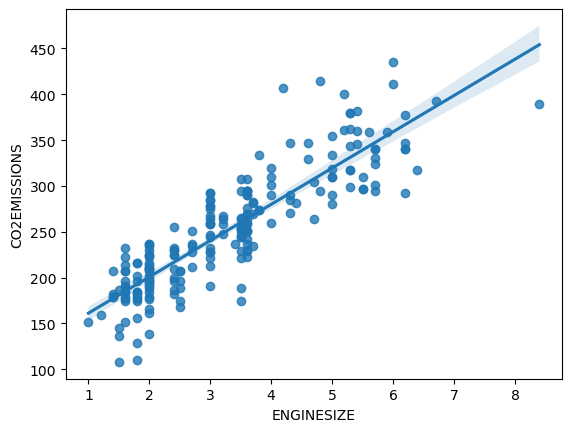

In [556]:
sns.regplot(x="ENGINESIZE", y="CO2EMISSIONS", data=df_test, fit_reg=True)
plt.show()

####  Graficamos los residuales

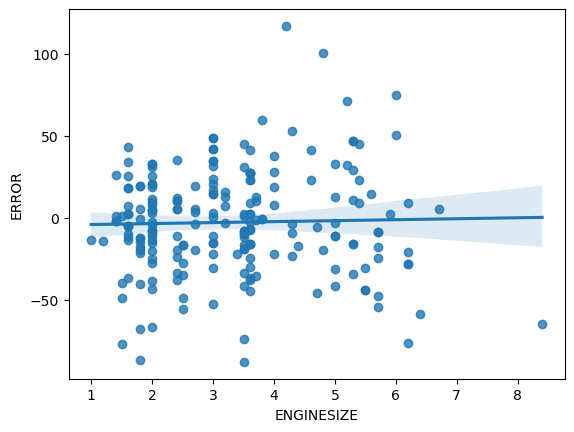

In [557]:
df_test["ERROR"] = y_test - lm.predict(X_test)
sns.regplot(x="ENGINESIZE", y="ERROR", data=df_test, fit_reg=True)
plt.show()

### 6.- Calculando MSE y R2 para modelo de regresion simple en los datos de entrenamiento y prueba


In [558]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_train_hat = lm.predict(X_train)
print("MAE train:", mean_absolute_error(y_train, y_train_hat))
print("MSE train:", mean_squared_error(y_train, y_train_hat))
print("R2 train:", r2_score(y_train, y_train_hat))

y_test_hat = lm.predict(X_test)
print("MAE test:", mean_absolute_error(y_test, y_test_hat))
print("MSE test:", mean_squared_error(y_test, y_test_hat))
print("R2 test:", r2_score(y_test, y_test_hat))

MAE train: 23.19873782395719
MSE train: 936.7860103082572
R2 train: 0.7644042001810549
MAE test: 24.097257411707844
MSE test: 985.9381692275001
R2 test: 0.7615595731934373


### 7.- Haciendo predicciones y calculando métrica para regresión simple mediante validación cruzada


In [559]:
X = cdf[['ENGINESIZE']]
y = cdf['CO2EMISSIONS']

model = LinearRegression()

### **Valización Cruzada**

Es muy útil para validar que el modelo de aprendizaje automático elegido es el correcto y ayuda a evitar el overfitting.


<img src="images/kfold.jpg" width="400"/>


Documentacion 
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

In [560]:
from sklearn.model_selection import cross_val_predict

y_cv_hat = cross_val_predict(model, X, y, cv=5)
y_cv_hat[0:5]

array([201.70277046, 217.41090047, 182.06760795, 260.608258  ,
       260.608258  ])

In [561]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print("R2 scores for each fold:", scores)
print("Mean R2 score:", scores.mean())


R2 scores for each fold: [0.74334613 0.7838278  0.72801992 0.73032948 0.78636053]
Mean R2 score: 0.7543767707250393


### 8.- Calculando métricas de desempeño para regresión simple mediante validación cruzada


In [562]:
from sklearn.model_selection import cross_validate

list_scoring = ['r2', 'neg_mean_squared_error']
list_scores = cross_validate(model, X, y, cv=5, scoring=list_scoring, return_train_score=False)

df_scores = pd.DataFrame(list_scores)
df_scores.head()

,fit_time,score_time,test_r2,test_neg_mean_squared_error
0,0.001099,0.000576,0.743346,-880.019764
1,0.000722,0.000507,0.783828,-1055.037158
2,0.000478,0.000608,0.728020,-1075.619670
3,0.000428,0.000416,0.730329,-1023.274235
4,0.000365,0.000378,0.786361,-747.383399


In [563]:
MSE_test = -list_scores['test_neg_mean_squared_error']
print("MSE test for each fold:", MSE_test)
print("Mean MSE test:", MSE_test.mean())

R2_test = list_scores['test_r2']
print("R2 test for each fold:", R2_test)
print("Mean R2 test:", R2_test.mean())


MSE test for each fold: [ 880.01976439 1055.03715804 1075.61966982 1023.27423464  747.38339934]
Mean MSE test: 956.2668452461579
R2 test for each fold: [0.74334613 0.7838278  0.72801992 0.73032948 0.78636053]
Mean R2 test: 0.7543767707250393


In [564]:
from sklearn.model_selection import cross_validate

list_scoring = ['r2', 'neg_mean_squared_error']
list_scores = cross_validate(model, X, y, cv=5, scoring=list_scoring, return_train_score=True)

df_scores = pd.DataFrame(list_scores)
df_scores.head()

,fit_time,score_time,test_r2,train_r2,test_neg_mean_squared_error,train_neg_mean_squared_error
0,0.000857,0.000480,0.743346,0.764833,-880.019764,-966.430448
1,0.000767,0.000523,0.783828,0.757121,-1055.037158,-919.550324
2,0.000422,0.000394,0.728020,0.772190,-1075.619670,-914.742235
3,0.000376,0.000387,0.730329,0.769227,-1023.274235,-928.436812
4,0.000367,0.000386,0.786361,0.756613,-747.383399,-996.858715


In [565]:
MSE_train = -list_scores['train_neg_mean_squared_error']
print("MSE train for each fold:", MSE_train)
print("Mean MSE train:", MSE_train.mean())

R2_train = list_scores['train_r2']
print("R2 train for each fold:", R2_train)
print("Mean R2 train:", R2_train.mean())

MSE train for each fold: [966.43044831 919.5503243  914.74223494 928.43681233 996.85871542]
Mean MSE train: 945.2037070617034
R2 train for each fold: [0.76483329 0.75712109 0.77218984 0.76922695 0.75661337]
Mean R2 train: 0.763996907116833


### 9.- Coeficientes para regresión simple mediante validación cruzada


In [566]:
from sklearn.model_selection import cross_validate

estimators = cross_validate(model, X, y, cv=5, return_estimator=True)

df_estimators = pd.DataFrame(estimators)
df_estimators.head()

,fit_time,score_time,estimator,test_score
0,0.000975,0.000409,LinearRegression(),0.743346
1,0.000431,0.000291,LinearRegression(),0.783828
2,0.000370,0.000284,LinearRegression(),0.728020
3,0.000370,0.000322,LinearRegression(),0.730329
4,0.000380,0.000270,LinearRegression(),0.786361


In [567]:
for i, est in enumerate(estimators['estimator']):
    print(f"Estimator {i} coefficients: {est.coef_}, intercept: {est.intercept_}")

Estimator 0 coefficients: [39.27032503], intercept: 123.16212040430028
Estimator 1 coefficients: [38.77237039], intercept: 126.8853840622669
Estimator 2 coefficients: [39.51513913], intercept: 123.51055848424673
Estimator 3 coefficients: [39.17922779], intercept: 126.14743687399331
Estimator 4 coefficients: [38.80652617], intercept: 127.10513637542542


### 10.- Creando función para gráfico de distribución


In [568]:
def distribution_plot(RedFunction, BlueFunction, RedName, BlueName, Title):
    plt.figure(figsize=(6, 6))
    sns.kdeplot(RedFunction, color="red", label=RedName)
    sns.kdeplot(BlueFunction, color="blue", label=BlueName)
    plt.title(Title)
    plt.xlabel('Emisión de CO2')
    plt.ylabel('Tamaño del motor del auto')
    plt.legend()
    plt.show()

### 11.- Realizando gráficos de predicciones para datos de entrenamiento y prueba


In [569]:
from sklearn.linear_model import LinearRegression

# Entrenamiento del modelo
lm = LinearRegression()
lm.fit(X_train, y_train) 

# Valores calculados
y_train_hat = lm.predict(X_train)
y_test_hat = lm.predict(X_test)


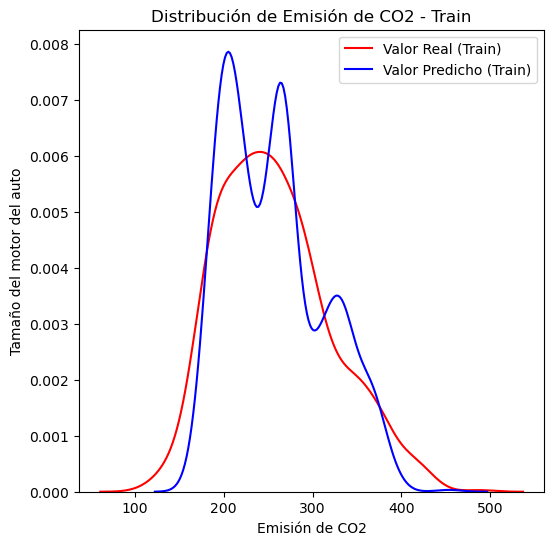

In [570]:
# Distribución de los valores reales vs valores predichos - Train data
distribution_plot(y_train, y_train_hat, "Valor Real (Train)", "Valor Predicho (Train)", "Distribución de Emisión de CO2 - Train")   

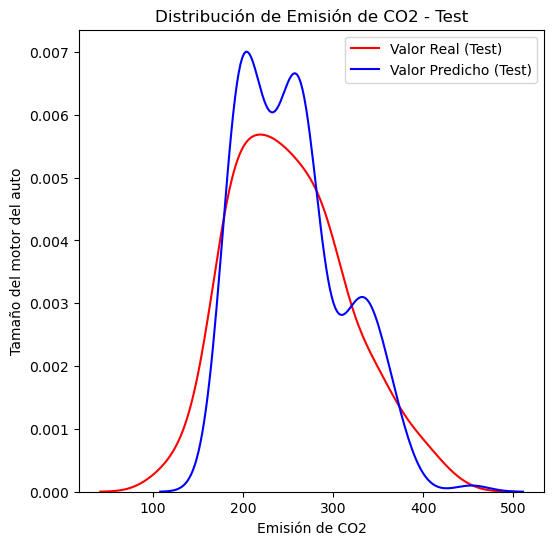

In [571]:
# Distribución de los valores reales vs valores predichos - Test data
distribution_plot(y_test, y_test_hat, "Valor Real (Test)", "Valor Predicho (Test)", "Distribución de Emisión de CO2 - Test")   

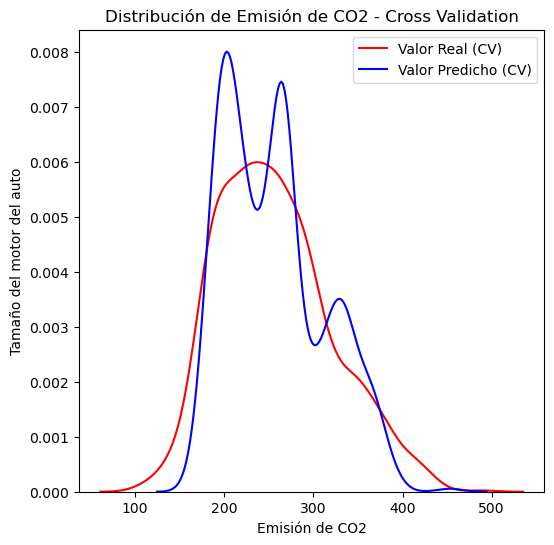

In [572]:
# Distribución de los valores reales vs valores predichos - Cross Validation data
distribution_plot(y, y_cv_hat, "Valor Real (CV)", "Valor Predicho (CV)", "Distribución de Emisión de CO2 - Cross Validation")

# PARTE 2: Modelo de regresión con varias variables predictora

In [573]:
X = cdf[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']]
y = cdf['CO2EMISSIONS']

In [574]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Tamaño de X_train:", X_train.shape)
print("Tamaño de X_test:", X_test.shape)
print("Tamaño de y_train:", y_train.shape)
print("Tamaño de y_test:", y_test.shape)

Tamaño de X_train: (853, 3)
Tamaño de X_test: (214, 3)
Tamaño de y_train: (853,)
Tamaño de y_test: (214,)


In [575]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train) 

print("Coeficiente:", lm.coef_)
print("Intercepción:", lm.intercept_)

Coeficiente: [11.2094395   7.15561381  9.5208118 ]
Intercepción: 67.34838518362108


$$ \hat{y} = 67.35 + 11.21x_{1} + 7.16x_{2} + 9.52x_{3} $$

In [576]:
df_train = pd.concat([X_train, y_train], axis=1)
y_train_hat = lm.predict(X_train)
residuales = y_train - y_train_hat
residuales.head()

333    -6.926388
106    -2.829139
585    28.833577
55      9.552359
213    38.903280
Name: CO2EMISSIONS, dtype: float64

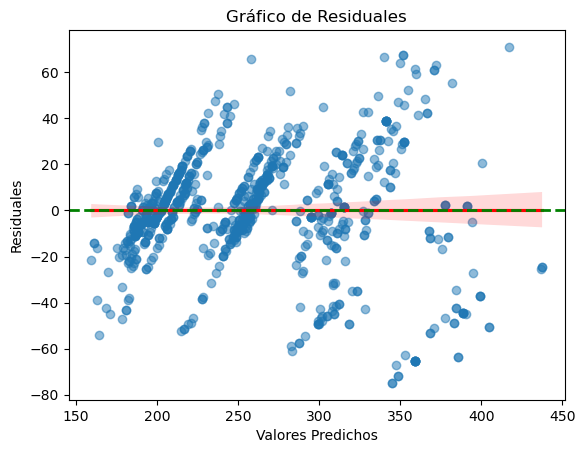

In [577]:

sns.regplot(x=y_train_hat, y=residuales, 
            scatter_kws={'alpha': 0.5},
            line_kws={'color': 'red'})
plt.axhline(y=0, color='green', linestyle='--', linewidth=2)
plt.xlabel('Valores Predichos')
plt.ylabel('Residuales')
plt.title('Gráfico de Residuales')
plt.show()

In [578]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_train_hat = lm.predict(X_train)
print("MAE train:", mean_absolute_error(y_train, y_train_hat))
print("MSE train:", mean_squared_error(y_train, y_train_hat))
print("R2 train:", r2_score(y_train, y_train_hat))

y_test_hat = lm.predict(X_test)
print("MAE test:", mean_absolute_error(y_test, y_test_hat))
print("MSE test:", mean_squared_error(y_test, y_test_hat))
print("R2 test:", r2_score(y_test, y_test_hat))

MAE train: 16.980180766116078
MSE train: 554.3023826742203
R2 train: 0.860596431041164
MAE test: 16.7215939835165
MSE test: 512.8551370148303
R2 test: 0.8759705206914069


In [579]:
from sklearn.model_selection import cross_val_predict

y_cv_hat = cross_val_predict(model, X, y, cv=5)

In [580]:
from sklearn.model_selection import cross_validate

list_scoring = ['r2', 'neg_mean_squared_error']
list_scores = cross_validate(model, X, y, cv=5, scoring=list_scoring, return_train_score=False)

df_scores = pd.DataFrame(list_scores)
df_scores.head()

,fit_time,score_time,test_r2,test_neg_mean_squared_error
0,0.001125,0.000587,0.880519,-409.678242
1,0.000680,0.000480,0.769097,-1126.933655
2,0.000828,0.000586,0.819583,-713.508189
3,0.000467,0.000480,0.884902,-436.745121
4,0.000456,0.000443,0.895584,-365.283424


In [581]:
MSE_test = -list_scores['test_neg_mean_squared_error']
print("MSE test for each fold:", MSE_test)
print("Mean MSE test:", MSE_test.mean())

R2_test = list_scores['test_r2']
print("R2 test for each fold:", R2_test)
print("Mean R2 test:", R2_test.mean())

MSE test for each fold: [ 409.67824154 1126.93365483  713.50818876  436.74512061  365.28342353]
Mean MSE test: 610.4297258541549
R2 test for each fold: [0.88051915 0.76909654 0.81958305 0.88490155 0.89558377]
Mean R2 test: 0.8499368120958023


In [582]:
from sklearn.model_selection import cross_validate

list_scoring = ['r2', 'neg_mean_squared_error']
list_scores = cross_validate(model, X, y, cv=5, scoring=list_scoring, return_train_score=True)

df_scores = pd.DataFrame(list_scores)
df_scores.head()

,fit_time,score_time,test_r2,train_r2,test_neg_mean_squared_error,train_neg_mean_squared_error
0,0.001127,0.001573,0.880519,0.857538,-409.678242,-585.454563
1,0.000696,0.000552,0.769097,0.885363,-1126.933655,-434.021830
2,0.000512,0.000483,0.819583,0.873981,-713.508189,-506.011106
3,0.000480,0.000449,0.884902,0.856889,-436.745121,-575.758076
4,0.000467,0.000468,0.895584,0.854763,-365.283424,-594.860415


In [583]:
MSE_train = -list_scores['train_neg_mean_squared_error']
print("MSE train for each fold:", MSE_train)
print("Mean MSE train:", MSE_train.mean())

R2_train = list_scores['train_r2']
print("R2 train for each fold:", R2_train)
print("Mean R2 train:", R2_train.mean())

MSE train for each fold: [585.45456309 434.02182959 506.01110641 575.75807607 594.86041529]
Mean MSE train: 539.2211980884638
R2 train for each fold: [0.85753819 0.88536272 0.87398147 0.85688908 0.8547627 ]
Mean R2 train: 0.8657068321922399


### Graficando valores del MSE para los datos de entrenamiento y prueba


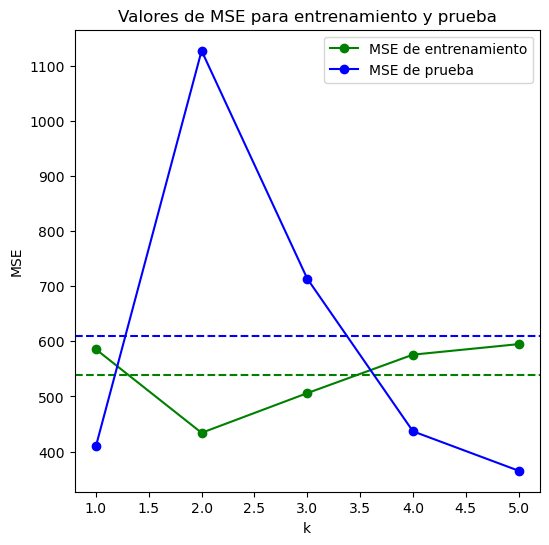

In [584]:
k = np.arange(1,len(MSE_train)+1)
plt.figure(figsize=(6,6))
plt.title('Valores de MSE para entrenamiento y prueba')
plt.plot(k,MSE_train,marker='o',linestyle='-',color='g',label='MSE de entrenamiento')
plt.axhline(y=np.mean(MSE_train),color='g',linestyle='--')
plt.plot(k,MSE_test,marker='o',linestyle='-',color='b',label='MSE de prueba')
plt.axhline(y=np.mean(MSE_test),color='b',linestyle='--')
plt.legend()
plt.xlabel('k')
plt.ylabel('MSE')
plt.show()

### Graficando valores del R2 para los datos de entrenamiento y prueba


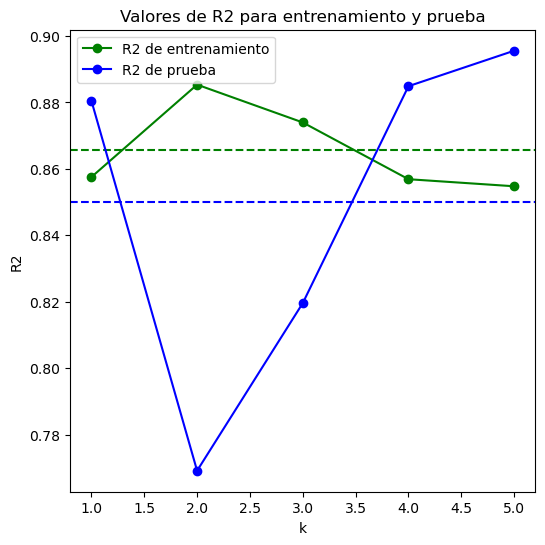

In [585]:
k = np.arange(1,len(MSE_train)+1)
plt.figure(figsize=(6,6))
plt.title('Valores de R2 para entrenamiento y prueba')
plt.plot(k,R2_train,marker='o',linestyle='-',color='g',label='R2 de entrenamiento')
plt.axhline(y=np.mean(R2_train),color='g',linestyle='--')
plt.plot(k,R2_test,marker='o',linestyle='-',color='b',label='R2 de prueba')
plt.axhline(y=np.mean(R2_test),color='b',linestyle='--')
plt.legend()
plt.xlabel('k')
plt.ylabel('R2')
plt.show()

### Coeficientes para regresión múltiple mediante validación cruzada

In [586]:
X = cdf[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']]
y = cdf['CO2EMISSIONS']
model = LinearRegression()

In [587]:
from sklearn.model_selection import cross_validate

estimators = cross_validate(model, X, y, cv=5, return_estimator=True)

df_estimators = pd.DataFrame(estimators)
df_estimators.head()

,fit_time,score_time,estimator,test_score
0,0.001174,0.000507,LinearRegression(),0.880519
1,0.000601,0.000333,LinearRegression(),0.769097
2,0.000421,0.000297,LinearRegression(),0.819583
3,0.000405,0.000279,LinearRegression(),0.884902
4,0.000384,0.000300,LinearRegression(),0.895584


In [588]:
for i, est in enumerate(estimators['estimator']):
    print(f"Estimator {i} coefficients: {est.coef_}, intercept: {est.intercept_}")

Estimator 0 coefficients: [13.94836049  5.55035543  9.1577801 ], intercept: 69.91801700851971
Estimator 1 coefficients: [ 7.139617    6.93869399 11.9477128 ], intercept: 56.016653070108816
Estimator 2 coefficients: [11.56106964  7.18081943  9.86179342], intercept: 61.67098288855715
Estimator 3 coefficients: [11.81521025  7.5955932   8.88680877], intercept: 69.96805133389802
Estimator 4 coefficients: [9.94765129 9.15011706 8.90416034], intercept: 66.31504810614206


## Realizando gráficos de predicciones para datos de entrenamiento y prueba

In [589]:
from sklearn.linear_model import LinearRegression

# Entrenamiento del modelo
lm = LinearRegression()
lm.fit(X_train, y_train) 

# Valores calculados
y_train_hat = lm.predict(X_train)
y_test_hat = lm.predict(X_test)

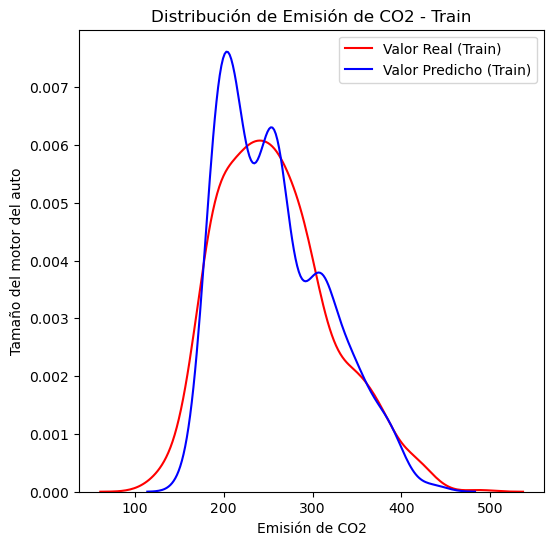

In [590]:
# Distribución de los valores reales vs valores predichos - Train data
distribution_plot(y_train, y_train_hat, "Valor Real (Train)", "Valor Predicho (Train)", "Distribución de Emisión de CO2 - Train")   

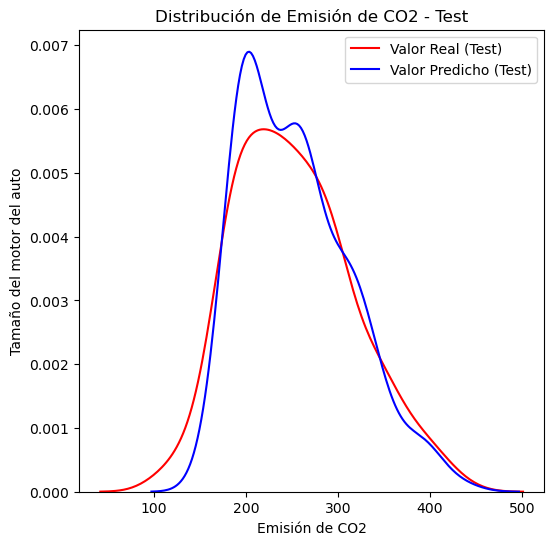

In [591]:
# Distribución de los valores reales vs valores predichos - Test data
distribution_plot(y_test, y_test_hat, "Valor Real (Test)", "Valor Predicho (Test)", "Distribución de Emisión de CO2 - Test")   

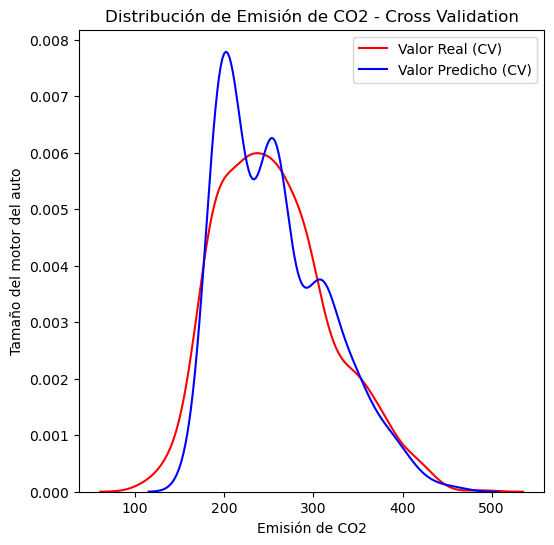

In [592]:
# Distribución de los valores reales vs valores predichos - Cross Validation data
distribution_plot(y, y_cv_hat, "Valor Real (CV)", "Valor Predicho (CV)", "Distribución de Emisión de CO2 - Cross Validation")

### AIC y BIC

In [593]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


In [594]:
# Regresión usando la librería statsmodels
import statsmodels.formula.api as smf
modelo1 = smf.ols('CO2EMISSIONS ~  ENGINESIZE', data=cdf).fit()
modelo2 = smf.ols('CO2EMISSIONS ~  CYLINDERS', data=cdf).fit()
modelo3 = smf.ols('CO2EMISSIONS ~  FUELCONSUMPTION_COMB', data=cdf).fit()
modelo4 = smf.ols('CO2EMISSIONS ~  ENGINESIZE + CYLINDERS + FUELCONSUMPTION_COMB', data=cdf).fit()

In [595]:
resultados = pd.DataFrame({
    'Modelo': ['Modelo 1', 'Modelo 2', 'Modelo 3', 'Modelo 4'],
    'AIC': [round(modelo1.aic, 2), round(modelo2.aic, 2), 
            round(modelo3.aic, 2), round(modelo4.aic, 2)],
    'BIC': [round(modelo1.bic, 2), round(modelo2.bic, 2), 
            round(modelo3.bic, 2), round(modelo4.bic, 2)]
})
resultados

,Modelo,AIC,BIC
0,Modelo 1,10343.71,10353.66
1,Modelo 2,10519.27,10529.22
2,Modelo 3,10189.45,10199.40
3,Modelo 4,9760.29,9780.18


In [596]:
for i in range(len(resultados)):
    if (resultados['AIC'][i] == np.min(resultados['AIC'])):
        min_AIC = resultados['AIC'][i]
        modelo_AIC = resultados['Modelo'][i]
    else:
        continue

print("Mejor modelo según AIC es", modelo_AIC, "con AIC =", min_AIC)

Mejor modelo según AIC es Modelo 4 con AIC = 9760.29


In [597]:
for i in range(len(resultados)):
    if (resultados['BIC'][i] == np.min(resultados['BIC'])):
        min_BIC = resultados['BIC'][i]
        modelo_BIC = resultados['Modelo'][i]
    else:
        continue

print("Mejor modelo según BIC es", modelo_BIC, "con BIC =", min_BIC)

Mejor modelo según BIC es Modelo 4 con BIC = 9780.18
